In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np



In [2]:
IMAGE_SIZE = 256
EPOCHS=50

BATCH_SIZE = 32
EPOCHS=50

In [3]:
df=tf.keras.preprocessing.image_dataset_from_directory(
"PlantVillage",
shuffle=True,
image_size=(IMAGE_SIZE,IMAGE_SIZE),
batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
cn=df.class_names
cn

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
for image_batch, labels_batch in df.take(1):
    print(image_batch[0].shape)
    print(labels_batch.numpy())

(256, 256, 3)
[1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 2 1 0 0 0 1 1 0 0 0 1 1 2]


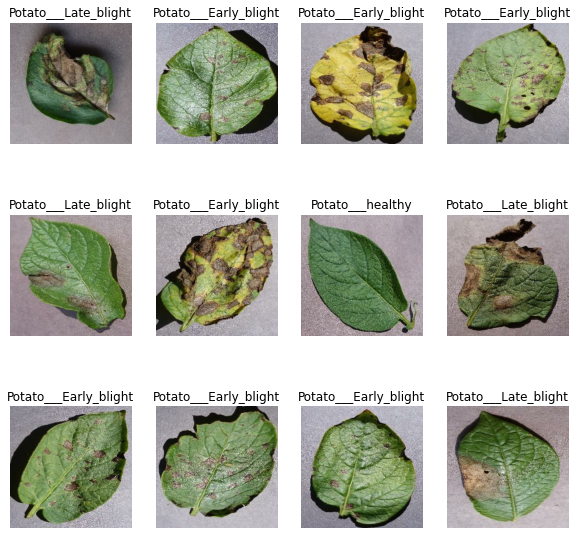

In [6]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in df.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(cn[labels_batch[i]])
        plt.axis("off")

In [7]:
len(df)*0.8

54.400000000000006

In [8]:
train_ds=df.take(54)

In [9]:
test_ds = df.skip(54)

In [10]:
val_ds = test_ds.take(6)
test_ds = test_ds.skip(6)

In [11]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [12]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(df)

In [13]:
train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [14]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [15]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [28]:
in_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,3)
model=models.Sequential(
[
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation="relu",input_shape=in_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax'),
    
    
    
]
)
model.build(input_shape=in_shape)

# New model

In [16]:
in_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,3)
model1=models.Sequential(
[
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation="relu",input_shape=in_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(1024, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(3, activation='softmax'),
    
    
    
]
)
model1.build(input_shape=in_shape)

In [17]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 128)        

In [18]:

model1.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [19]:
history = model1.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=10,
)

Epoch 1/10
54/54 [==============================] - 447s 6s/step - loss: 0.8574 - accuracy: 0.5393 - val_loss: 0.6369 - val_accuracy: 0.7240
Epoch 2/10
54/54 [==============================] - 557s 10s/step - loss: 0.6408 - accuracy: 0.6989 - val_loss: 0.6785 - val_accuracy: 0.7031
Epoch 3/10
54/54 [==============================] - 238s 4s/step - loss: 0.5545 - accuracy: 0.7529 - val_loss: 0.5518 - val_accuracy: 0.7448
Epoch 4/10
54/54 [==============================] - 252s 4s/step - loss: 0.3548 - accuracy: 0.8490 - val_loss: 0.2128 - val_accuracy: 0.9010
Epoch 5/10
54/54 [==============================] - 240s 4s/step - loss: 0.3135 - accuracy: 0.8652 - val_loss: 0.3203 - val_accuracy: 0.9010
Epoch 6/10
54/54 [==============================] - 266s 5s/step - loss: 0.2358 - accuracy: 0.9068 - val_loss: 0.1472 - val_accuracy: 0.9635
Epoch 7/10
54/54 [==============================] - 244s 4s/step - loss: 0.1362 - accuracy: 0.9460 - val_loss: 0.3467 - val_accuracy: 0.8802
Epoch 8/10
5

In [21]:
scores=model1.evaluate(test_ds)

8/8 [==============================] - 12s 813ms/step - loss: 0.1255 - accuracy: 0.9492


In [33]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [34]:
history.history['accuracy']

[0.4953051507472992,
 0.6402581930160522,
 0.7517605423927307,
 0.8425925970077515,
 0.8738425970077515,
 0.8935185074806213,
 0.9295774698257446,
 0.9231220483779907,
 0.9460093975067139,
 0.9448356628417969,
 0.9530516266822815,
 0.9383803009986877,
 0.9606807231903076,
 0.9636150002479553,
 0.9718309640884399,
 0.9606807231903076,
 0.9776995182037354,
 0.9542253613471985,
 0.9530516266822815,
 0.9853286147117615,
 0.9823943376541138,
 0.9571596384048462,
 0.96772301197052,
 0.9853286147117615,
 0.9606807231903076,
 0.9782863855361938,
 0.9712441563606262,
 0.9900234937667847,
 0.98591548204422,
 0.9900234937667847,
 0.9947183132171631,
 0.9882628917694092,
 0.9865023493766785,
 0.9923709034919739,
 0.9829812049865723,
 0.9935445785522461,
 0.9797453880310059,
 0.9941314458847046,
 0.9941314458847046,
 0.9774305820465088,
 0.9947183132171631,
 0.9953051805496216,
 0.9782863855361938,
 0.9917840361595154,
 0.9976525902748108,
 0.9906103014945984,
 0.9941314458847046,
 0.99765259027481

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

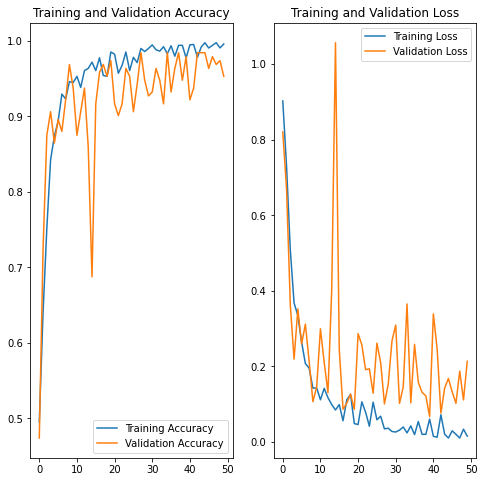

In [38]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Late_blight
predicted label: Potato___Late_blight


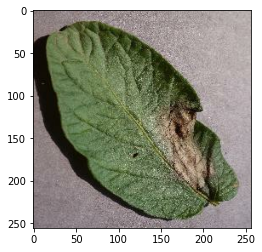

In [41]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[4].numpy().astype('uint8')
    first_label = labels_batch[4].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",cn[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",cn[np.argmax(batch_prediction[4])])

In [42]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)

    predicted_class = cn[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

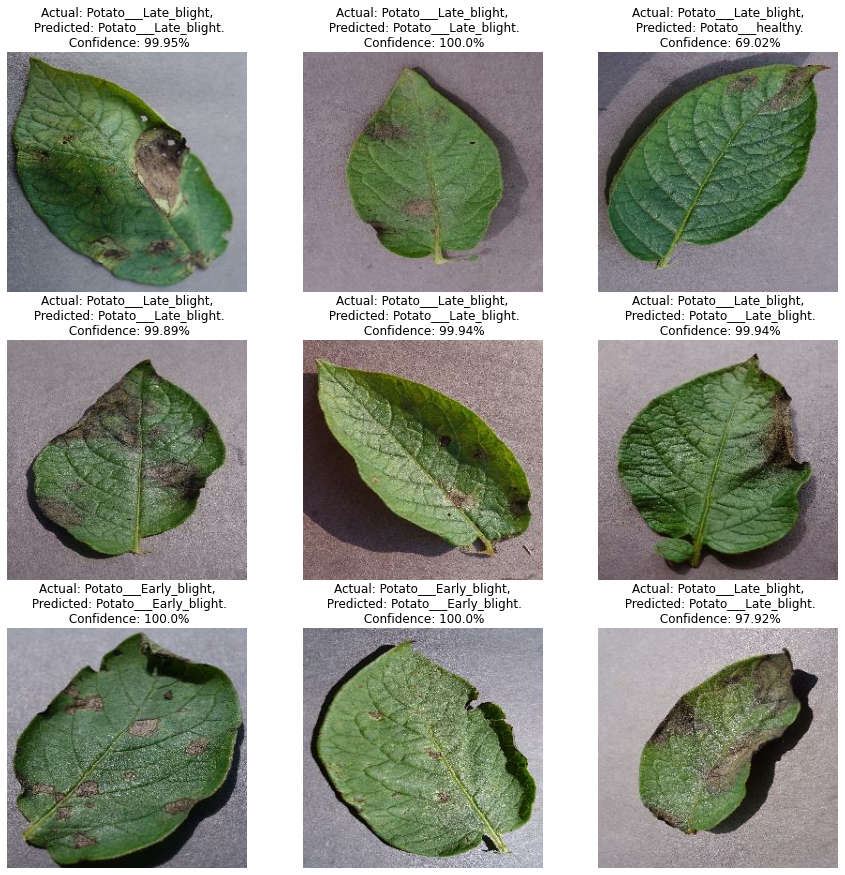

In [44]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = cn[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [22]:
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model1.save(f"../models/model111")

INFO:tensorflow:Assets written to: ../models/model111\assets


In [4]:
model1 = tf.keras.models.load_model("../models/2")

In [3]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 256, 256, 3)       0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 60, 60, 64)       

In [24]:
from sklearn.metrics import classification_report
ypred=np.argmax(predictions[0])
print(classification_report(labels, ypred, target_names=cn))


NameError: name 'predictions' is not defined

In [5]:
from PIL import Image
img=Image.open("test.jpg")
array = tf.keras.preprocessing.image.img_to_array(img)


In [6]:
array

array([[[173., 160., 169.],
        [174., 161., 170.],
        [175., 162., 171.],
        ...,
        [176., 163., 173.],
        [173., 160., 170.],
        [169., 156., 166.]],

       [[177., 164., 173.],
        [179., 166., 175.],
        [179., 166., 175.],
        ...,
        [175., 162., 172.],
        [173., 160., 170.],
        [170., 157., 167.]],

       [[180., 167., 176.],
        [180., 167., 176.],
        [180., 167., 176.],
        ...,
        [173., 160., 170.],
        [173., 160., 170.],
        [171., 158., 168.]],

       ...,

       [[181., 162., 168.],
        [209., 190., 196.],
        [159., 140., 146.],
        ...,
        [200., 189., 197.],
        [195., 184., 192.],
        [166., 155., 163.]],

       [[164., 145., 151.],
        [154., 135., 141.],
        [170., 151., 157.],
        ...,
        [162., 151., 159.],
        [165., 154., 162.],
        [163., 152., 160.]],

       [[135., 116., 122.],
        [142., 123., 129.],
        [168., 1

In [10]:
pr=model1.predict(np.expand_dims(array,0))

In [13]:
pr[0]

array([2.6253151e-06, 1.9798349e-04, 9.9979943e-01], dtype=float32)

In [25]:
test_ds

<PrefetchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [26]:
y_pred = []  # store predicted labels
y_true = []  # store true labels
for image_batch, label_batch in test_ds:   # use dataset.unbatch() with repeat
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model1.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

In [29]:
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

In [31]:
from sklearn.metrics import classification_report
#ypred=np.argmax(predictions[0])
print(classification_report(correct_labels, predicted_labels,target_names=cn))


                       precision    recall  f1-score   support

Potato___Early_blight       0.95      1.00      0.97       122
 Potato___Late_blight       0.98      0.90      0.94       110
     Potato___healthy       0.85      0.92      0.88        24

             accuracy                           0.95       256
            macro avg       0.92      0.94      0.93       256
         weighted avg       0.95      0.95      0.95       256

